In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


**1.Import Required Libraries:**

In [3]:
import pandas as pd
import numpy as np
import os
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")


2024-02-26 21:27:24.638013: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 21:27:24.638167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 21:27:24.790577: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**2.Load The Dataset:**

In [4]:
df = pd.read_csv("/kaggle/input/iriscsv/Iris.csv")

**3.Data Exploration:**

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [28]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
x = df.drop(columns=['Id','Species'])
y = df['Species']
x.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [12]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=70)

In [14]:
x_train.shape

(105, 4)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
46            5.1           3.8            1.6           0.2
[[-0.83923753  1.90623312 -1.25660744 -1.33641685]]


In [16]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [18]:
model = Sequential()
model.add(Dense(units=32, activation='relu',input_shape=(x_train.shape[-1],)))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation = 'softmax'))

In [19]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Train The Model**

In [20]:
model.fit(x_train, y_train, epochs=100, verbose = 2)

Epoch 1/100
4/4 - 1s - loss: 1.0829 - accuracy: 0.3905 - 672ms/epoch - 168ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1046 - accuracy: 0.3143 - 9ms/epoch - 2ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9570 - accuracy: 0.5143 - 9ms/epoch - 2ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9230 - accuracy: 0.5810 - 7ms/epoch - 2ms/step
Epoch 5/100
4/4 - 0s - loss: 0.8775 - accuracy: 0.6095 - 8ms/epoch - 2ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8781 - accuracy: 0.6667 - 8ms/epoch - 2ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8220 - accuracy: 0.6667 - 9ms/epoch - 2ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8008 - accuracy: 0.6571 - 8ms/epoch - 2ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7692 - accuracy: 0.7048 - 9ms/epoch - 2ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7385 - accuracy: 0.7143 - 8ms/epoch - 2ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6980 - accuracy: 0.7048 - 8ms/epoch - 2ms/step
Epoch 12/100
4/4 - 0s - loss: 0.6524 - accuracy: 0.7524 - 11ms/epoch - 3ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6203 - accuracy: 0.7714 

**Print Prediction For X-Test**

In [21]:
prediction = model.predict(x_test)
print(prediction)

2/2 [==============================] - 0s 3ms/step
[[9.99458730e-01 4.25517967e-04 1.15754839e-04]
 [8.59930660e-05 5.29521257e-02 9.46961880e-01]
 [1.17628835e-02 7.51443386e-01 2.36793727e-01]
 [7.30872946e-03 9.60545838e-01 3.21454220e-02]
 [4.28528401e-05 7.37136183e-03 9.92585719e-01]
 [4.59210901e-03 5.85650265e-01 4.09757614e-01]
 [9.99863863e-01 1.00791724e-04 3.53204050e-05]
 [9.99665916e-01 2.99471460e-04 3.46810193e-05]
 [9.98990893e-01 8.73706769e-04 1.35444614e-04]
 [1.00510065e-02 8.82510245e-01 1.07438803e-01]
 [1.85153875e-02 8.76973689e-01 1.04510978e-01]
 [3.55619341e-02 8.92374635e-01 7.20632970e-02]
 [8.63999012e-05 8.56731180e-03 9.91346359e-01]
 [1.27945356e-02 8.67111444e-01 1.20094061e-01]
 [9.99850035e-01 1.20878169e-04 2.91664419e-05]
 [3.57522583e-03 7.40217507e-01 2.56207317e-01]
 [9.99574363e-01 3.82058497e-04 4.34518988e-05]
 [9.99783754e-01 1.87410813e-04 2.90148128e-05]
 [1.68879833e-05 3.24447732e-03 9.96738613e-01]
 [1.25632418e-04 1.13994321e-02 9.884

**Print Prediction using Numpy**

In [22]:
prediction = np.argmax(prediction, axis = -1)
print(prediction)

[0 2 1 1 2 1 0 0 0 1 1 1 2 1 0 1 0 0 2 2 1 2 1 2 1 2 1 0 0 0 1 1 2 2 1 2 0
 2 2 0 2 0 0 0 0]


**Print Y-Test**

In [23]:
print(y_test)

18     0
107    2
91     1
69     1
104    2
54     1
14     0
7      0
20     0
94     1
96     1
88     1
136    2
97     1
16     0
76     1
49     0
21     0
100    2
115    2
99     1
127    2
56     1
105    2
75     1
147    2
67     1
33     0
19     0
48     0
61     1
57     1
135    2
108    2
89     1
134    2
43     0
120    2
122    2
2      0
68     1
37     0
17     0
27     0
32     0
Name: Species, dtype: int64


**Test Accuracy**

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy =', accuracy_score(y_test, prediction))

Accuracy 0.9777777777777777


**Confusion Matrix Test**

In [25]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 15  1]
 [ 0  0 13]]


**Draw a Confusion Matrix**

Text(0.5, 1.0, 'Confusion matrix for Iris Dataset')

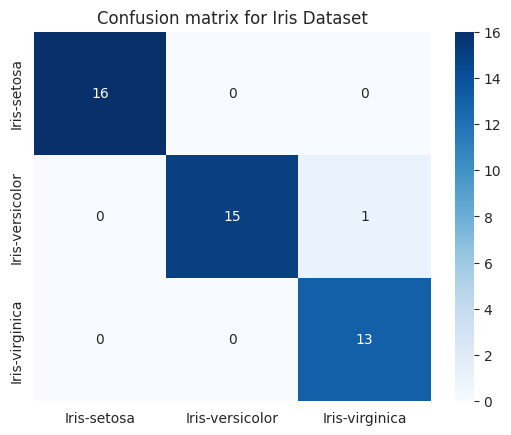

In [30]:
graph = sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',xticklabels = species_name, yticklabels = species_name)
graph.set_title('Confusion matrix for Iris Dataset')